# Top quark analyse

In [ ]:
import sys
#!{sys.executable} -m pip install --upgrade --user pip
!{sys.executable} -m pip install uproot3 pandas numpy matplotlib

In [1]:
import uproot3 # for reading .root files
import pandas as pd # to store data as dataframe
import time # to measure time to analyse
import math # for mathematical functions such as square root
import numpy as np # for numerical calculations such as histogramming
from itertools import combinations 
import matplotlib.pyplot as plt # for plotting
from matplotlib.ticker import AutoMinorLocator # for minor ticks

BIGGER_SIZE = 16
plt.rc('font', size=BIGGER_SIZE)
plt.rcParams['figure.figsize'] = [12,8]
#plt.style.use('default')

import infofile # local file containing cross-sections, sums of weights, dataset IDs

In [2]:
#lumi = 0.5 # fb-1 # data_A only
#lumi = 1.9 # fb-1 # data_B only
#lumi = 2.9 # fb-1 # data_C only
#lumi = 4.7 # fb-1 # data_D only
lumi = 10 # fb-1 # data_A,data_B,data_C,data_D

fraction = 0.01 # reduce this is you want the code to run quicker
#fraction = 0.1 # reduce this is you want the code to run quicker
                                                                                                                                  
#tuple_path = r'C:\Users\jacob\Desktop\1lep/' # local
tuple_path = '../data/'
#tuple_path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/" # web address

MV2c10_cut = 0.8244
GeV_cut = 30*1000


In [3]:
samples = {

    'data': {
        'list' : ['data_A','data_B','data_C','data_D'],
    },

    r'V+jets' : { # V+jets
        'list' : [

# ls | grep "36110[6-8]" | grep Z
'Zee'
,'Zmumu'
,'Ztautau'

# ls | grep "36110[0-5]" | grep W
,'Wplusenu'
,'Wplusmunu'
,'Wplustaunu'
,'Wminusenu'
,'Wminusmunu'
,'Wminustaunu'

# ls | grep "3641[0-9][0-9]" | grep W      
,'Wmunu_PTV0_70_CVetoBVeto'
,'Wmunu_PTV0_70_CFilterBVeto'
,'Wmunu_PTV0_70_BFilter'
,'Wmunu_PTV70_140_CVetoBVeto'
,'Wmunu_PTV70_140_CFilterBVeto'
,'Wmunu_PTV70_140_BFilter'
,'Wmunu_PTV140_280_CVetoBVeto'
,'Wmunu_PTV140_280_CFilterBVeto'
,'Wmunu_PTV140_280_BFilter'
,'Wmunu_PTV280_500_CVetoBVeto'
,'Wmunu_PTV280_500_CFilterBVeto'
,'Wmunu_PTV280_500_BFilter'
,'Wmunu_PTV500_1000'
,'Wmunu_PTV1000_E_CMS'
,'Wenu_PTV0_70_CVetoBVeto'
,'Wenu_PTV0_70_CFilterBVeto'
,'Wenu_PTV0_70_BFilter'
,'Wenu_PTV70_140_CVetoBVeto'
,'Wenu_PTV70_140_CFilterBVeto'
,'Wenu_PTV70_140_BFilter'
,'Wenu_PTV140_280_CVetoBVeto'
,'Wenu_PTV140_280_CFilterBVeto'
,'Wenu_PTV140_280_BFilter'
,'Wenu_PTV280_500_CVetoBVeto'
,'Wenu_PTV280_500_CFilterBVeto'
,'Wenu_PTV280_500_BFilter'
,'Wenu_PTV500_1000'
,'Wenu_PTV1000_E_CMS'
,'Wtaunu_PTV0_70_CVetoBVeto'
,'Wtaunu_PTV0_70_CFilterBVeto'
,'Wtaunu_PTV0_70_BFilter'
,'Wtaunu_PTV70_140_CVetoBVeto'
,'Wtaunu_PTV70_140_CFilterBVeto'
,'Wtaunu_PTV70_140_BFilter'
,'Wtaunu_PTV140_280_CVetoBVeto'
,'Wtaunu_PTV140_280_CFilterBVeto'
,'Wtaunu_PTV140_280_BFilter'
,'Wtaunu_PTV280_500_CVetoBVeto'
,'Wtaunu_PTV280_500_CFilterBVeto'
,'Wtaunu_PTV280_500_BFilter'
,'Wtaunu_PTV500_1000'
,'Wtaunu_PTV1000_E_CMS'

# ls | grep "3641[0-9][0-9]" | grep Z
,'Zmumu_PTV0_70_CVetoBVeto'
,'Zmumu_PTV0_70_CFilterBVeto'
,'Zmumu_PTV0_70_BFilter'
,'Zmumu_PTV70_140_CVetoBVeto'
,'Zmumu_PTV70_140_CFilterBVeto'
,'Zmumu_PTV70_140_BFilter'
,'Zmumu_PTV140_280_CVetoBVeto'
,'Zmumu_PTV140_280_CFilterBVeto'
,'Zmumu_PTV140_280_BFilter'
,'Zmumu_PTV280_500_CVetoBVeto'
,'Zmumu_PTV280_500_CFilterBVeto'
,'Zmumu_PTV280_500_BFilter'
,'Zmumu_PTV500_1000'
,'Zmumu_PTV1000_E_CMS'
,'Zee_PTV0_70_CVetoBVeto'
,'Zee_PTV0_70_CFilterBVeto'
,'Zee_PTV0_70_BFilter'
,'Zee_PTV70_140_CVetoBVeto'
,'Zee_PTV70_140_CFilterBVeto'
,'Zee_PTV70_140_BFilter'
,'Zee_PTV140_280_CVetoBVeto'
,'Zee_PTV140_280_CFilterBVeto'
,'Zee_PTV140_280_BFilter'
,'Zee_PTV280_500_CVetoBVeto'
,'Zee_PTV280_500_CFilterBVeto'
,'Zee_PTV280_500_BFilter'
,'Zee_PTV500_1000'
,'Zee_PTV1000_E_CMS'
,'Ztautau_PTV0_70_CVetoBVeto'
,'Ztautau_PTV0_70_CFilterBVeto'
,'Ztautau_PTV0_70_BFilter'
,'Ztautau_PTV70_140_CVetoBVeto'
,'Ztautau_PTV70_140_CFilterBVeto'
,'Ztautau_PTV70_140_BFilter'
,'Ztautau_PTV140_280_CVetoBVeto'
,'Ztautau_PTV140_280_CFilterBVeto'
,'Ztautau_PTV140_280_BFilter'
,'Ztautau_PTV280_500_CVetoBVeto'
,'Ztautau_PTV280_500_CFilterBVeto'
,'Ztautau_PTV280_500_BFilter'
,'Ztautau_PTV500_1000'
,'Ztautau_PTV1000_E_CMS'
        ],
        'color' : "#ff0000" # red
    },

    r'Single top' : { # Single top
        'list' : [
# ls | grep "410011\|410012\|410013\|410014\|410025\|410026"
'single_top_tchan'
,'single_antitop_tchan'
,'single_top_wtchan'
,'single_antitop_wtchan'
,'single_top_schan'
,'single_antitop_schan'
        ],
        'color' : "#00cdff" # light blue
    },
    
    r'Diboson' : { # Diboson
        # ls | grep "363359\|363360\|363492\|363356\|363490\|363358\|363489\|363491\|363493"
        'list' : ['ZqqZll','WqqZll','WpqqWmlv','WplvWmqq','WlvZqq','llll','lllv','llvv','lvvv'],
        'color' : "#00ff32" # green
    },

    r'$t\bar{t}$' : { # ttbar
        'list' : ['ttbar_lep'],
        'color' : "#6b59d3" # purple
    },
}



In [4]:
def get_data_from_files():
    data = {} # define empty dictionary to hold dataframes
    for s in samples: # loop over samples
        print('Processing '+s+' samples') # print which sample
        frames = [] # define empty list to hold data
        for val in samples[s]['list']: # loop over each file
            if s == 'data': prefix = "Data/" # Data prefix
            else: # MC prefix
                prefix = "MC/mc_"+str(infofile.infos[val]["DSID"])+"."
            fileString = tuple_path+prefix+val+".1lep.root" # file name to open
            temp = read_file(fileString,val) # call the function read_file defined below
            frames.append(temp) # append dataframe returned from read_file to list of dataframes
        data[s] = pd.concat(frames) # dictionary entry is concatenated dataframes
    
    return data # return dictionary of dataframes

In [5]:
def calc_weight(xsec_weight, mcWeight, scaleFactor_PILEUP,
                scaleFactor_ELE, scaleFactor_MUON, 
                scaleFactor_LepTRIGGER ):
    return xsec_weight*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER

In [6]:
def get_xsec_weight(sample):
    info = infofile.infos[sample] # open infofile
    xsec_weight = (lumi*1000*info["xsec"])/(info["sumw"]*info["red_eff"]) #*1000 to go from fb-1 to pb-1
    return xsec_weight # return cross-section weight

In [47]:
def calc_mjjj(jet_pt,jet_eta,jet_phi,jet_E):
    px_0 = jet_pt[0]*math.cos(jet_phi[0]) # x-component of lep[0] momentum
    py_0 = jet_pt[0]*math.sin(jet_phi[0]) # y-component of lep[0] momentum
    pz_0 = jet_pt[0]*math.sinh(jet_eta[0]) # z-component of lep[0] momentum
    px_1 = jet_pt[1]*math.cos(jet_phi[1]) # x-component of lep[1] momentum
    py_1 = jet_pt[1]*math.sin(jet_phi[1]) # y-component of lep[1] momentum
    pz_1 = jet_pt[1]*math.sinh(jet_eta[1]) # z-component of lep[1] momentum
    px_2 = jet_pt[2]*math.cos(jet_phi[2]) # x-component of lep[2] momentum
    py_2 = jet_pt[2]*math.sin(jet_phi[2]) # y-component of lep[2] momentum
    pz_2 = jet_pt[2]*math.sinh(jet_eta[2]) # z-component of lep[3] momentum
    sumpx = px_0 + px_1 + px_2 # x-component of 4-jets
    sumpy = py_0 + py_1 + py_2 # y-component of 4 jets
    sumpz = pz_0 + pz_1 + pz_2 # z-component of 4 jets
    sumE = jet_E[0] + jet_E[1] + jet_E[2] # energy of 4 jets
    jjj_pt = (px_0+px_1+px_2)**2+(py_0+py_1+py_2)**2
    jjj_m = math.sqrt(sumE**2 - sumpx**2 - sumpy**2 - sumpz**2)/1000 #/1000 to go from MeV to GeV
    return jjj_pt, jjj_m

def calc_mjj(jet_pt,jet_eta,jet_phi,jet_E):
    px_0 = jet_pt[0]*math.cos(jet_phi[0]) # x-component of lep[0] momentum
    py_0 = jet_pt[0]*math.sin(jet_phi[0]) # y-component of lep[0] momentum
    pz_0 = jet_pt[0]*math.sinh(jet_eta[0]) # z-component of lep[0] momentum
    px_1 = jet_pt[1]*math.cos(jet_phi[1]) # x-component of lep[1] momentum
    py_1 = jet_pt[1]*math.sin(jet_phi[1]) # y-component of lep[1] momentum
    pz_1 = jet_pt[1]*math.sinh(jet_eta[1]) # z-component of lep[1] momentum
    sumpx = px_0 + px_1# x-component of 2 jets
    sumpy = py_0 + py_1# y-component of 2 jets
    sumpz = pz_0 + pz_1# z-component of 2 jets
    sumE = jet_E[0] + jet_E[1]# energy of 2 jets
    jj_m = math.sqrt(sumE**2 - sumpx**2 - sumpy**2 - sumpz**2)/1000 #/1000 to go from MeV to GeV
    return jj_m

In [54]:
#tjekker om der kun er én b-tagget i en kombination
def en_btag_tjek(data):
    filtered = list(filter(lambda d: d[0] > MV2c10_cut, data))
    return len(filtered) == 1

def mjjj_bedste(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E):
    try:
        samlet = zip(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E)
        comb = combinations(samlet, 3) # laver alle kombinationer
        en_btagget_comb = list(filter(en_btag_tjek, comb)) # laver liste med rigtige komb. liste med tre tupler
        liste_pt_m = []
        for jets in en_btagget_comb:
            z = list(zip(*jets))  # laver fem lister med tre værdier i hver liste
            pt, m = calc_mjjj(z[1],z[2],z[3],z[4])
            liste_pt_m.append((pt,m))
        liste_pt, liste_m = list(zip(*liste_pt_m))
        bedste = np.argmax(liste_pt) # hvilket index i listen har højest værdi    
        mjjj = liste_m[bedste]
        mW_zipped = list(zip(*[j for j in en_btagget_comb[bedste] if j[0] <= MV2c10_cut]))
        mW = calc_mjj(mW_zipped[1],mW_zipped[2],mW_zipped[3],mW_zipped[4])
        
        return mjjj, mW # slår op og får værdien
    except ValueError:
        return 0,0

In [65]:
def cut_lep_pt(lep_pt):
    return lep_pt < GeV_cut

def cut_jet_n(jet_n):
    return jet_n < 4

def jet_pt_30GeV(jet_pt):
    # the jet pt is sorted by largest
    return jet_pt[3] > GeV_cut

def b_tag_70(jet_MV2c10):
    return len([num for num in jet_MV2c10 if num > MV2c10_cut]) > 1

def MT_W(lep_pt, lep_phi, met_et, met_phi):
    return np.sqrt(2*lep_pt*met_et*(1-np.cos(lep_phi-met_phi)))

Cuts som kræver 1 lep
Samt 4 jets hvor 2 af jets har 70% sikkerhed

find invariant masse for 3 jets sammnenlagt. (der er 2 forskellige sammensætninger grundet 2 b jets.) 

In [50]:
def read_file(path,sample):
    start = time.time() # start the clock
    print("\tProcessing: "+sample) # print which sample is being processed
    data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
    tree = uproot3.open(path)["mini"] # open the tree called mini
    numevents = uproot3.numentries(path, "mini") # number of events
    
    # variables to calculate Monte Carlo weight
    if 'data' not in sample: xsec_weight = get_xsec_weight(sample) # get cross-section weight

    root_variables = ['lep_pt','lep_eta','lep_phi','lep_E','lep_charge','lep_type'
                  ,'met_et','met_phi'
                  ,'jet_n','jet_pt','jet_eta','jet_phi','jet_E','jet_MV2c10'
                  ,'mcWeight','scaleFactor_PILEUP','scaleFactor_ELE','scaleFactor_MUON','scaleFactor_LepTRIGGER']
    
    for data in tree.iterate(root_variables, outputtype=pd.DataFrame, entrystop=numevents*fraction):    
        nIn = len(data.index) # number of events in this batch

        if 'data' not in sample: # only do this for Monte Carlo simulation files
            # multiply all Monte Carlo weights and scale factors together to give total weight
            data['totalWeight'] = np.vectorize(calc_weight)(xsec_weight,
                                                            data.mcWeight,
                                                            data.scaleFactor_PILEUP,
                                                            data.scaleFactor_ELE,
                                                            data.scaleFactor_MUON,
                                                            data.scaleFactor_LepTRIGGER)
    
        # cut jet number
        fail = data[ np.vectorize(cut_jet_n)(data.jet_n) ].index
        data.drop(fail, inplace=True)
        
        # b-tag
        data['jet_pt_30GeV'] = np.vectorize(jet_pt_30GeV)(data.jet_pt)

        # cut lep pt
        fail = data[ np.vectorize(cut_lep_pt)(data.lep_pt) ].index
        data.drop(fail, inplace=True)
        
        # b-tag
        data['b_tag'] = np.vectorize(b_tag_70)(data.jet_MV2c10)
    
        # Invariant mass
        _, data['mjjj'] = np.vectorize(calc_mjjj)(data.jet_pt,data.jet_eta,data.jet_phi,data.jet_E)

        data['mjjj_bedste'], data['mW_kand'] = np.vectorize(mjjj_bedste)(data.jet_MV2c10,data.jet_pt,data.jet_eta,data.jet_phi,data.jet_E)
        
        #
        data['MT_W'] = np.vectorize(MT_W)(data.lep_pt, data.lep_phi, data.met_et, data.met_phi)

        nOut = len(data.index) # number of events passing cuts in this batch
        data_all = data_all.append(data) # append dataframe from this batch to the dataframe for the whole sample
        elapsed = time.time() - start # time taken to process
        print("\t\t nIn: "+str(nIn)+",\t nOut: \t"+str(nOut)+"\t in "+str(round(elapsed,1))+"s") # events before and after
      
    return data_all # return dataframe containing events passing all cuts

In [55]:
start = time.time() # time at start of whole processing
data = get_data_from_files() # process all files
elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Processing data samples
	Processing: data_A
		 nIn: 97964,	 nOut: 	1828	 in 3.6s
	Processing: data_B
		 nIn: 175460,	 nOut: 	3406	 in 6.9s
		 nIn: 173301,	 nOut: 	3327	 in 11.9s
	Processing: data_C
		 nIn: 175520,	 nOut: 	3595	 in 7.1s
		 nIn: 175520,	 nOut: 	3553	 in 12.5s
		 nIn: 159586,	 nOut: 	3217	 in 17.2s
	Processing: data_D
		 nIn: 175582,	 nOut: 	4336	 in 7.3s
		 nIn: 175582,	 nOut: 	3841	 in 12.7s
		 nIn: 175582,	 nOut: 	3594	 in 18.0s
		 nIn: 175582,	 nOut: 	3593	 in 23.3s
		 nIn: 25650,	 nOut: 	514	 in 24.6s
Processing V+jets samples
	Processing: Zee
		 nIn: 164429,	 nOut: 	1852	 in 5.4s
	Processing: Zmumu
		 nIn: 128170,	 nOut: 	1009	 in 5.5s
	Processing: Ztautau
		 nIn: 9869,	 nOut: 	197	 in 2.0s
	Processing: Wplusenu
		 nIn: 126342,	 nOut: 	521	 in 4.9s
	Processing: Wplusmunu
		 nIn: 133968,	 nOut: 	457	 in 6.7s
	Processing: Wplustaunu
		 nIn: 5509,	 nOut: 	40	 in 1.5s
	Processing: Wminusenu
		 nIn: 93956,	 nOut: 	378	 in 4.4s
	Processing: Wminusmunu
		 nIn: 110802,	 nOu

In [52]:
#d1 = tuple_path+'Data/data_A.1lep.root'\n",
#d1 = tuple_path+'MC/mc_364184.Wtaunu_PTV0_70_CVetoBVeto.1lep.root'
d1 = tuple_path+'Data/data_A.1lep.root'
dtest = read_file(d1, r'data')
print('done')

	Processing: data
		 nIn: 97964,	 nOut: 	1828	 in 3.0s
done


In [53]:
dtest

,lep_pt,lep_eta,lep_phi,lep_E,lep_charge,lep_type,met_et,met_phi,jet_n,jet_pt,...,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,jet_pt_30GeV,b_tag,mjjj,mjjj_bedste,mW_kand,MT_W
entry,,,,,,,,,,,,,,,,,,,,,
103,[111969.61],[-1.2983997],[0.61432594],[220378.48],[-1],[13],39748.914062,-0.590609,6,"[118696.42, 60372.133, 31864.127, 27943.557, 2...",...,0.0,0.0,0.0,0.0,False,True,220.445346,133.664155,81.453962,75609.867188
137,[47394.902],[0.3454792],[1.2247137],[50251.58],[1],[11],29311.541016,-1.970879,5,"[63654.555, 59761.22, 33486.867, 22406.45, 202...",...,0.0,0.0,0.0,0.0,False,True,243.160283,151.143851,78.841560,74517.250000
245,[53513.938],[-2.3587732],[-2.8392951],[285563.8],[-1],[11],9450.745117,-1.100348,4,"[76612.43, 33650.72, 29444.754, 20502.02]",...,0.0,0.0,0.0,0.0,False,False,183.696806,0.000000,0.000000,34362.425781
274,[141024.22],[0.8945215],[1.1199301],[201309.83],[-1],[11],12214.380859,-3.074841,4,"[125714.734, 27433.254, 24590.795, 23727.838]",...,0.0,0.0,0.0,0.0,False,False,158.489356,0.000000,0.000000,71761.375000
304,[31771.027],[0.43135178],[-0.7938594],[34772.87],[1],[11],17225.589844,-1.001861,4,"[48210.805, 27500.012, 25693.979, 23326.924]",...,0.0,0.0,0.0,0.0,False,False,231.242500,0.000000,0.000000,4857.204102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97852,[31804.984],[-1.0359652],[-0.4259459],[50453.97],[-1],[11],80678.445312,-0.024620,4,"[40410.906, 36823.85, 23189.398, 21437.104]",...,0.0,0.0,0.0,0.0,False,False,151.236124,0.000000,0.000000,20193.183594
97905,[36937.188],[-1.894137],[2.5356464],[125535.8],[1],[11],66697.578125,-1.895543,7,"[212612.06, 125002.18, 121028.555, 93087.875, ...",...,0.0,0.0,0.0,0.0,True,False,576.761226,0.000000,0.000000,79338.460938
97924,[42523.633],[-1.2165221],[2.557062],[78066.73],[-1],[11],24643.478516,-2.326959,5,"[49336.734, 48841.76, 39445.22, 31867.463, 253...",...,0.0,0.0,0.0,0.0,True,False,189.274624,0.000000,0.000000,41688.207031


In [56]:
data['data']

,lep_pt,lep_eta,lep_phi,lep_E,lep_charge,lep_type,met_et,met_phi,jet_n,jet_pt,...,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,jet_pt_30GeV,b_tag,mjjj,mjjj_bedste,mW_kand,MT_W
entry,,,,,,,,,,,,,,,,,,,,,
103,[111969.61],[-1.2983997],[0.61432594],[220378.48],[-1],[13],39748.914062,-0.590609,6,"[118696.42, 60372.133, 31864.127, 27943.557, 2...",...,0.0,0.0,0.0,0.0,False,True,220.445346,133.664155,81.453962,75609.867188
137,[47394.902],[0.3454792],[1.2247137],[50251.58],[1],[11],29311.541016,-1.970879,5,"[63654.555, 59761.22, 33486.867, 22406.45, 202...",...,0.0,0.0,0.0,0.0,False,True,243.160283,151.143851,78.841560,74517.250000
245,[53513.938],[-2.3587732],[-2.8392951],[285563.8],[-1],[11],9450.745117,-1.100348,4,"[76612.43, 33650.72, 29444.754, 20502.02]",...,0.0,0.0,0.0,0.0,False,False,183.696806,0.000000,0.000000,34362.425781
274,[141024.22],[0.8945215],[1.1199301],[201309.83],[-1],[11],12214.380859,-3.074841,4,"[125714.734, 27433.254, 24590.795, 23727.838]",...,0.0,0.0,0.0,0.0,False,False,158.489356,0.000000,0.000000,71761.375000
304,[31771.027],[0.43135178],[-0.7938594],[34772.87],[1],[11],17225.589844,-1.001861,4,"[48210.805, 27500.012, 25693.979, 23326.924]",...,0.0,0.0,0.0,0.0,False,False,231.242500,0.000000,0.000000,4857.204102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727878,[90278.79],[0.56674963],[-0.37862673],[105170.125],[-1],[13],54786.265625,0.377996,4,"[86142.14, 46488.8, 25101.37, 22406.28]",...,0.0,0.0,0.0,0.0,False,True,126.894723,152.000000,66.000000,51951.613281
727882,[64496.273],[0.33676243],[0.852107],[68188.27],[-1],[13],122992.359375,2.782380,5,"[120954.9, 118519.3, 77315.91, 27436.275, 2080...",...,0.0,0.0,0.0,0.0,False,False,364.124120,215.000000,66.000000,146445.156250
727917,[39246.008],[0.44926003],[-3.1157613],[43273.67],[-1],[11],59414.246094,0.333815,6,"[29543.574, 25070.969, 23842.879, 23203.941, 2...",...,0.0,0.0,0.0,0.0,False,False,197.732721,0.000000,0.000000,95434.023438


In [58]:
def plot_data_query(data, query, column, p_xmin = 100, p_xmax = 240, p_step_size = 5):

    xmin = p_xmin # GeV
    xmax = p_xmax # GeV
    step_size = p_step_size # GeV

    bin_edges = np.arange(start=xmin, # The interval includes this value
                     stop=xmax+step_size, # The interval doesn't include this value
                     step=step_size ) # Spacing between values
    bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                            stop=xmax+step_size/2, # The interval doesn't include this value
                            step=step_size ) # Spacing between values

    data_x,_ = np.histogram(data['data'].query(query)[column], 
                            bins=bin_edges ) # histogram the data
    data_x_errors = np.sqrt( data_x ) # statistical error on the data

    signal_x = data[r'$t\bar{t}$'].query(query)[column] # histogram the signal
    signal_weights = data[r'$t\bar{t}$'].query(query).totalWeight # get the weights of the signal events
    signal_color = samples[r'$t\bar{t}$']['color'] # get the colour for the signal bar

    mc_x = [] # define list to hold the Monte Carlo histogram entries
    mc_weights = [] # define list to hold the Monte Carlo weights
    mc_colors = [] # define list to hold the colors of the Monte Carlo bars
    mc_labels = [] # define list to hold the legend labels of the Monte Carlo bars

    for s in samples: # loop over samples
        if s not in ['data', r'$t\bar{t}$']: # if not data nor signal
            mc_x.append( data[s].query(query)[column] ) # append to the list of Monte Carlo histogram entries
            mc_weights.append( data[s].query(query).totalWeight ) # append to the list of Monte Carlo weights
            mc_colors.append( samples[s]['color'] ) # append to the list of Monte Carlo bar colors
            mc_labels.append( s ) # append to the list of Monte Carlo legend labels

    # *************
    # Main plot 
    # *************
    main_axes = plt.gca() # get current axes
    
    # plot the data points
    main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
                       fmt='ko', # 'k' means black and 'o' is for circles 
                       label='Data') 
    
    # plot the Monte Carlo bars
    mc_heights = main_axes.hist(mc_x, bins=bin_edges, 
                                weights=mc_weights, stacked=True, 
                                color=mc_colors, label=mc_labels )
    
    mc_x_tot = mc_heights[0][-1] # stacked background MC y-axis value
        
    # plot the signal bar
    mc_signal = main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, 
                   weights=signal_weights, color=signal_color,
                   label=r'$t\bar{t}$')

    mc_x_err = np.sqrt( mc_x_tot+mc_signal[0] ) # statistical error on the MC bars
    
    # plot the statistical uncertainty
    main_axes.bar(bin_centres, # x
                  2*mc_x_err, # heights
                  alpha=0.5, # half transparency
                  bottom=mc_x_tot+mc_signal[0]-mc_x_err, color='none',
                  hatch="////", width=step_size, label='Stat. Unc.' )

    # set the x-limit of the main axes
    main_axes.set_xlim( left=xmin, right=xmax ) 
    
    # separation of x axis minor ticks
    main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 
    
    # set the axis tick parameters for the main axes
    main_axes.tick_params(which='both', # ticks on both x and y axes
                          direction='in', # Put ticks inside and outside the axes
                          top=True, # draw ticks on the top axis
                          right=True ) # draw ticks on right axis
    
    # x-axis label
    main_axes.set_xlabel(r'4-lepton invariant mass $\mathrm{m_{4l}}$ [GeV]',
                        fontsize=13, x=1, horizontalalignment='right')
    
    # write y-axis label for main axes
    main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                         y=1, horizontalalignment='right') 
    
    # set y-axis limits for main axes
    main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )
    
    # add minor ticks on y-axis for main axes
    main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

    # Add text 'ATLAS Open Data' on plot
    plt.text(0.05, # x
             0.93, # y
             'ATLAS Open Data', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             fontsize=13 ) 
    
    # Add text 'for education' on plot
    plt.text(0.05, # x
             0.88, # y
             'for education', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             style='italic',
             fontsize=8 ) 
    
    # Add energy and luminosity
    lumi_used = str(lumi*fraction) # luminosity to write on the plot
    plt.text(0.05, # x
             0.82, # y
             '$\sqrt{s}$=13 TeV,$\int$L dt = '+lumi_used+' fb$^{-1}$', # text
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes
    
    # Add a label for the analysis carried out
    plt.text(0.05, # x
             0.76, # y
             r't $H \rightarrow ZZ^* \rightarrow 4\ell$', # text 
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes

    # draw the legend
    main_axes.legend( frameon=False ) # no box around the legend
    
    return

In [59]:
data['data'].loc[data['data']['b-tag'] == True]['mjjj']

entry
103       220.445346
137       243.160283
742       510.182089
759       183.110773
1080      148.196486
             ...    
726698    287.966005
727033    420.563073
727278    318.992922
727797    169.049702
727878    126.894723
Name: mjjj, Length: 4043, dtype: float64

In [117]:
#data['data'].loc[data['data']['mjjj_bedste'] != 0]
ALL = slice(None)
data['data'].query('b_tag == True & mjjj_bedste == 0')
#data['data'].loc[data['data']['b_tag'] == True]
#data[r'$t\bar{t}$'].rename(columns = {'b-tag':'b_tag'}, inplace = True)
#plot_data_query(data, '@ALL', 'mjjj')

,lep_pt,lep_eta,lep_phi,lep_E,lep_charge,lep_type,met_et,met_phi,jet_n,jet_pt,...,jet_E,jet_MV2c10,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,b_tag,mjjj,mjjj_bedste
entry,,,,,,,,,,,,,,,,,,,,,
22157,[31416.092],[-0.009044576],[-2.0053513],[31417.377],[1],[11],68631.226562,-2.412595,4,"[106639.26, 77222.49, 57151.707, 42883.977]",...,"[107957.336, 196018.25, 72790.09, 162344.97]","[0.99863744, 0.93467534, 0.98774487, -0.88142544]",0.0,0.0,0.0,0.0,0.0,True,296.565013,0.0
79875,[49210.73],[-0.45168477],[0.63071036],[54316.625],[-1],[11],52851.187500,-1.454223,4,"[176903.56, 145407.39, 53583.92, 26945.193]",...,"[183237.94, 163678.11, 82877.07, 28940.732]","[0.9999979, 0.85376996, 0.85910314, 0.3291975]",0.0,0.0,0.0,0.0,0.0,True,426.890983,0.0
5870,[36642.652],[1.3496287],[0.7318161],[75398.305],[-1],[11],75365.734375,0.696726,4,"[85043.63, 68309.734, 57573.477, 26296.611]",...,"[217337.36, 83103.58, 108453.5, 26610.664]","[0.9998362, 0.9999573, -0.82280535, 0.82756364]",0.0,0.0,0.0,0.0,0.0,True,325.345372,0.0
29427,[37124.656],[-0.6811684],[1.6523924],[46075.61],[1],[11],43035.195312,-0.073350,4,"[99734.97, 85709.58, 65469.227, 46443.957]",...,"[208780.94, 161124.47, 194214.2, 226287.88]","[0.90018666, 0.9998818, 0.8794994, -0.65961033]",0.0,0.0,0.0,0.0,0.0,True,510.199103,0.0
69467,[172343.28],[1.2584512],[1.5369545],[327802.03],[-1],[11],32035.187500,-2.210760,4,"[78199.945, 59101.8, 55922.26, 25081.201]",...,"[85434.68, 73021.84, 64015.18, 148630.14]","[-0.8257406, 0.89729923, 0.84684706, 0.9899213]",0.0,0.0,0.0,0.0,0.0,True,144.426300,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583510,[40477.59],[-0.6896875],[0.3674345],[50492.26],[1],[11],77443.703125,-2.421233,4,"[167802.27, 106245.055, 80898.68, 29819.762]",...,"[185888.31, 246817.64, 169394.97, 42215.28]","[0.99273556, 0.8523308, 0.99965715, -0.84570104]",0.0,0.0,0.0,0.0,0.0,True,601.632741,0.0
599027,[30653.848],[-0.40199077],[-0.6852319],[33164.16],[1],[11],26407.900391,0.221304,4,"[33450.676, 23511.783, 22069.004, 21403.463]",...,"[42746.027, 81078.36, 82084.53, 33016.684]","[0.99771154, -0.21512358, 0.8997893, 0.90147036]",0.0,0.0,0.0,0.0,0.0,True,201.363883,0.0
602054,[48850.695],[-0.3875655],[-0.46857205],[52565.816],[1],[13],105646.000000,-1.337417,4,"[172945.45, 133255.12, 93063.336, 23031.89]",...,"[566709.2, 155659.44, 298178.47, 76396.83]","[0.97392523, 0.99924535, -0.608837, 0.9258742]",0.0,0.0,0.0,0.0,0.0,True,466.843087,0.0


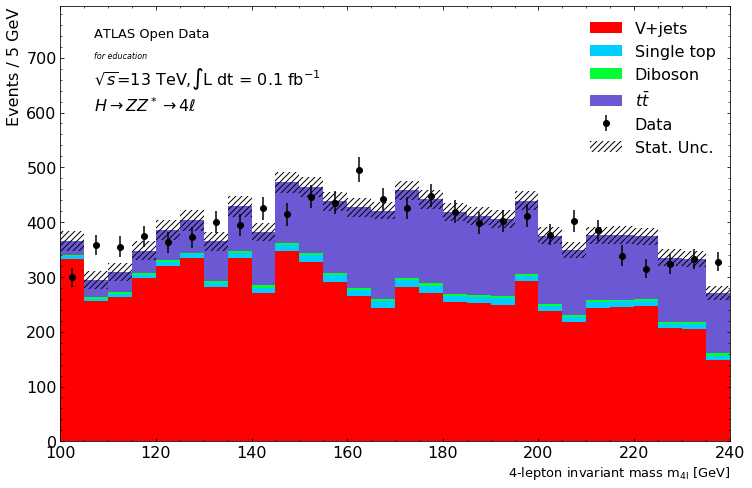

In [137]:
plot_data_query(data, 'met_et > @GeV_cut', 'mjjj')
#plot_data_query(data, '@ALL', 'mjjj')

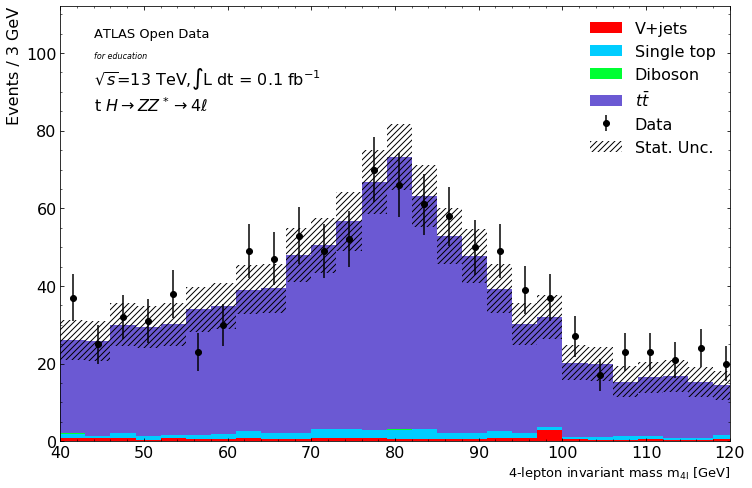

In [64]:
plot_data_query(data, 'mjjj_bedste != 0 & b_tag == True & jet_pt_30GeV == True & met_et > @GeV_cut & MT_W > @GeV_cut', 'mW_kand', p_xmin = 40, p_xmax = 120, p_step_size = 3)

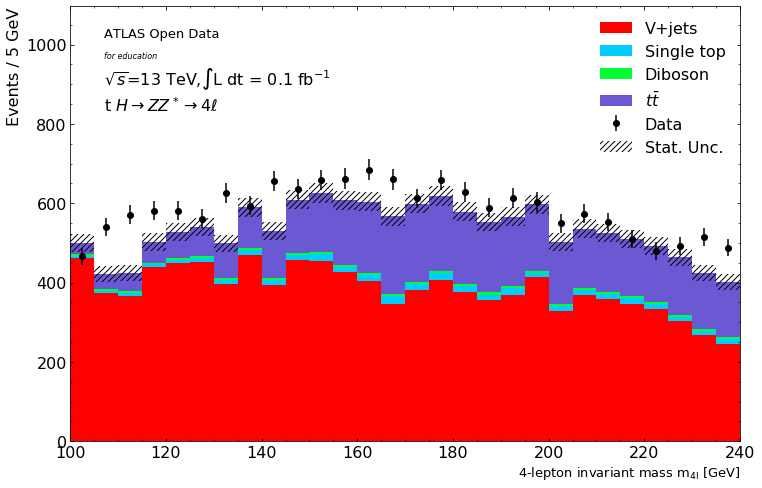

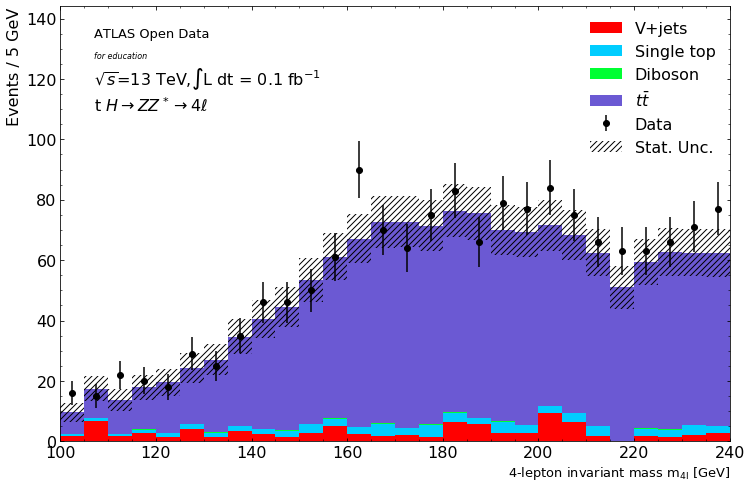

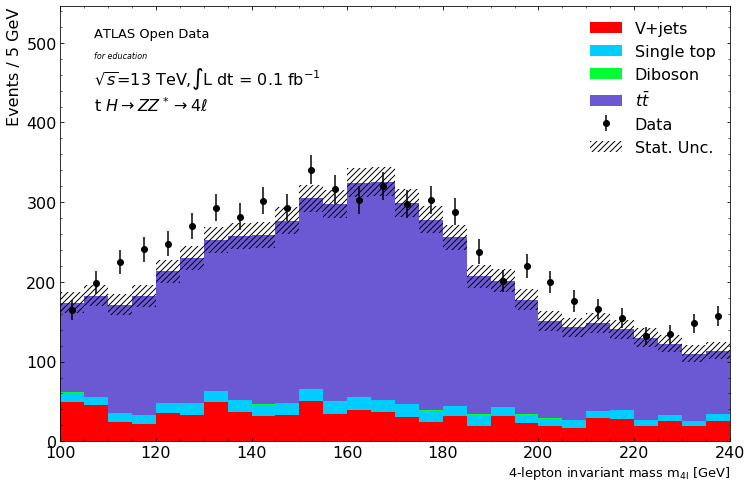

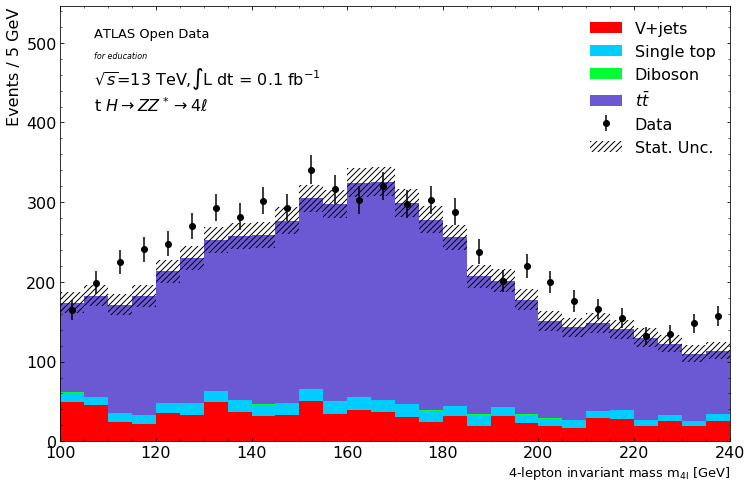

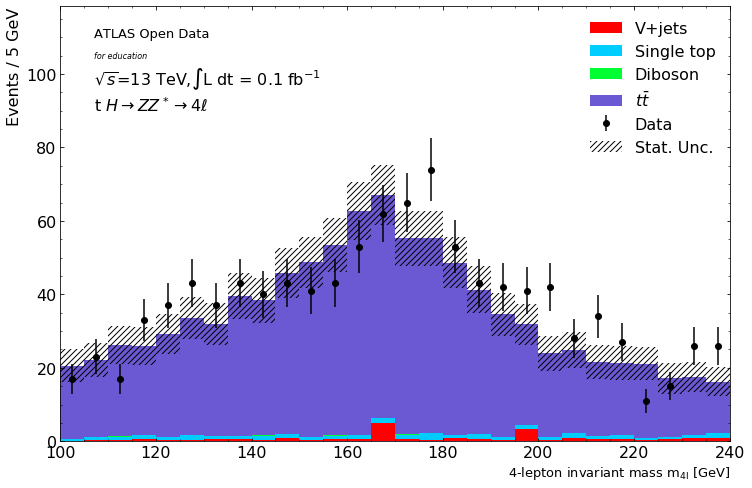

In [28]:
ALL = slice(None) # trick til at give en query der giver alle rækker
plot_data_query(data, '@ALL', 'mjjj')
plt.savefig('p1.png')
plt.show()
plot_data_query(data, 'b_tag == True', 'mjjj')
plt.savefig('p2.png')
plt.show()
plot_data_query(data, '@ALL', 'mjjj_bedste')
plt.savefig('p3.png')
plt.show()
plot_data_query(data, 'mjjj_bedste != 0', 'mjjj_bedste')
plt.savefig('p4.png')
plt.show()
plot_data_query(data, 'mjjj_bedste != 0 & b_tag == True & jet_pt_30GeV == True & met_et > @GeV_cut & MT_W > @GeV_cut', 'mjjj_bedste')
plt.savefig('p5.png')
plt.show()


# alle jet pt sammenlagt ht
# W massen, massen af de ikke b-taggede jets i den endelige top kandidat